# 未知量子态的经典影子

<em> Copyright (c) 2021 Institute for Quantum Computing, Baidu Inc. All Rights Reserved. </em>

## 概览

对于一个未知量子系统中的量子态 $\rho$，如何去获取它所包含的信息是一个十分基础且重要的问题。本教程将讨论如何通过经典影子（classical shadow） 技术用经典的数据来描述一个未知的量子态，从而可以高效地对该量子态的诸多性质进行有效估计。在 NISQ （noisy intermediate-scale quantum）时代，这个技术可以很好地帮助我们用经典资源来交换量子资源，在将量子态的信息用经典数据描述后，可以用经典机器学习等方法来解决一些量子问题。并且利用这个方法，一些现有的变分量子算法（例如变分量子本征求解器（variational quantum eigensolver, VQE））实现中的量子电路运行次数等代价将减小，进而提升算法的速度。

## 经典影子

经典影子的直觉来源于现实生活中的影子。我们用一束光垂直照向一个多面体，会在桌面上得到一个它的影子，旋转这个多面体，我们可以看到它不同形状的影子。在多次旋转后，这一系列的影子很自然地就反映了这个多面体的一些信息。类似地，在量子世界，如果我对一个量子态进行一次酉变换，然后进行一次测量，是否也能得到一个量子态的“影子”？经典影子的构建就和这个例子有相似之处，它的过程如下：

首先，我们对 $n$ 个量子比特系统中的一个未知量子态 $\rho$ 作用一个酉变换：$\rho \mapsto U \rho U^{\dagger}$ ，然后用计算基态去对每个量子位做测量。对于测量的结果这里用 $|\hat{b}\rangle$ 举例解释：对 $|\hat{b}\rangle$ 进行之前酉变换的逆变换得到 $U^{\dagger}|\hat{b}\rangle\langle\hat{b}|U$。我们知道，测得的量子态 $|\hat{b}\rangle\langle\hat{b}|$在计算基态下期望为：

$$
\mathbb{E}(|\hat{b}\rangle\langle\hat{b}|) =  \sum_{b \in \{0,1\}^{n}} \operatorname{Pr}(|\hat{b}\rangle\langle\hat{b}| = |b\rangle\langle b|)\cdot |b\rangle \langle b|=  \sum_{b \in \{0,1\}^{n}}\langle b|U\rho U^{\dagger} |b\rangle |b\rangle \langle b| \tag{1}
$$

那么进行了逆操作后，$U^{\dagger}|\hat{b}\rangle\langle\hat{b}|U$ 的期望就是 $\sum_{b \in \{0,1\}^{n}}\langle b|U\rho U^{\dagger} |b\rangle U^{\dagger}|b\rangle \langle b|U$。在这个过程中，酉变换 $U$ 是从一个固定的集合中随机选取。当我们重复这一过程，对每次随机选取的 $U$ 也求平均时，可以得到：

$$
\mathbb{E}_{U \sim \mathcal{U}\left(n\right)}(\mathbb{E}(U^{\dagger}|\hat{b}\rangle\langle\hat{b}|U))=\sum_{b \in \{0,1\}^{n}}\mathbb{E}_{U \sim \mathcal{U}\left(n\right)}(\langle b|U\rho U^{\dagger} |b\rangle U^{\dagger}|b\rangle \langle b|U) \tag{2}
$$ 

其中 $\mathcal{U}\left(n\right)$ 是给定的一个作用在 $n$ 个量子比特上的酉变换集合。

如果把这个期望的结果记作 $\mathcal{M}(\rho)$ ，则 $\mathcal{M}$ 将会是一个从 $\rho$ 到 $\mathcal{M}(\rho)$ 的映射。当 $\mathcal{M}$ 线性可逆时 [1]，初始的量子态 $\rho$ 就可以表达为：

$$
\rho=\mathcal{M}^{-1}(\mathbb{E}_{U \sim \mathcal{U} \left(n\right)}(\mathbb{E}(U^{\dagger}|\hat{b}\rangle\langle \hat{b}|U))) = \mathbb{E}_{U \sim \mathcal{U} \left(n\right)}(\mathbb{E}(\mathcal{M}^{-1} (U^{\dagger}|\hat{b}\rangle\langle \hat{b}|U))) \tag{3}
$$

有了 $\mathcal{M}^{-1}$后，每一次采样 $U$ ，对 $U^{\dagger}|\hat{b}\rangle\langle\hat{b}|U$ 作用 $\mathcal{M}^{-1}$ 的结果 $\hat{\rho} = \mathcal{M}^{-1}(U^{\dagger}|\hat{b}\rangle\langle\hat{b}|U)$ 被我们称为 $\rho$ 的一个快照（snapshot），重复这个过程 $N$ 次后得到 $N$ 个关于 $\rho$ 的快照的集合：

$$
\text{S}(\rho ; N)=\{\hat{\rho}_{1}=\mathcal{M}^{-1}(U_{1}^{\dagger}|\hat{b}_{1}\rangle\langle\hat{b}_{1}| U_{1}), \ldots, \hat{\rho}_{N}=\mathcal{M}^{-1}(U_{N}^{\dagger}|\hat{b}_{N}\rangle\langle\hat{b}_{N}| U_{N})\}   \tag{4}
$$

我们把 $\text{S}(\rho; N)$ 就称为 $\rho$ 的经典影子。值得一提的是，$\mathcal{M}$ 具体是什么取决于我们选取的采样集合 $\mathcal{U}$，例如当该集合选定为 Clifford 群时，我们有: 

$$
\mathcal{M}(\rho)=\mathbb{E}_{U \sim \operatorname{Cl} \left(n\right)}(\mathbb{E}(U^{\dagger}|\hat{b}\rangle\langle \hat{b}|U)) = \frac{1}{2^{n}+1}\rho+\frac{1}{2^{n}+1}I  \tag{5}
$$
（有关 $\mathcal{M}$ 的表达式为何如（5）所示，读者可以参考 [1]）。于是：

$$
\mathcal{M}^{-1}(\frac{1}{2^{n}+1}\rho+\frac{1}{2^{n}+1}I)=\rho \Rightarrow \mathcal{M}^{-1}(\rho) = (2^{n}+1)\rho-I  \tag{6}
$$

构建了经典影子之后，它是如何帮助我们有效估计量子态的性质的呢？[1] 中指出，关于量子态 $\rho$ 的一些线性性质就十分适合用经典影子技术来估计，例如 $\rho$ 在某个可观测量 $\mathcal{O}$ 下的期望：$o=\operatorname{tr}\left(\mathcal{O} \rho\right)$，我们记 $\hat{o}=\operatorname{tr}\left(\mathcal{O} \hat{\rho}\right)$，那么根据（3）式，就有 $\mathbb{E}[\hat{o}]=\operatorname{tr}\left(\mathcal{O} \rho\right)$。与之相关的应用与实现，读者可以阅读另一篇教程：[基于经典影子的量子态性质估计](./ClassicalShadow_Application_CN.ipynb)。

接下来，我们将在量桨中展示对一个随机生成的量子态 $\rho$ 构建其经典影子的过程，帮助读者更好地理解与感受经典影子这个技术。其中选取 Clifford 群作为酉变换的采样集合。（具体有关 Clifford 群的性质以及如何从中均匀随机采样 Clifford 变换，感兴趣的读者可以参考 [1]、[3] 以及量桨中的 `Clifford` 类）

## Paddle Quantum 代码实现

首先，我们导入需要用到的包。

In [1]:
import numpy as np
import paddle
import matplotlib.pyplot as plt
from paddle_quantum.clifford import Clifford
from paddle_quantum.state import vec_random
from paddle_quantum.circuit import UAnsatz
from paddle_quantum.utils import trace_distance

接下来，我们随机生成量子态 $\rho$。

In [2]:
# 设置量子比特数目
n_qubit = 2

# 随机生成态矢量 phi
phi_random = vec_random(n_qubit) 
# phi 的密度矩阵表示 rho
rho_random = np.outer(phi_random, phi_random.conj())

# 定义 |0> 和 |1>
ket_0 = np.array([[1,0]]).T
ket_1 = np.array([[0,1]]).T

# 定义单位矩阵与 M 逆的系数
I = np.identity(1<<n_qubit)
coefficient = float(1<<n_qubit) + 1.0

下一步，我们定义在测量时所需要的电路，并对我们记录测量结果做一些准备。

In [3]:
def measure_by_clifford(phi, num_qubit):
    """
    对 phi 进行 Clifford 变换后，进行计算基态下的测量
    """
    # 通过 Paddle Quantum 的 Clifford 类，来随机选取一个 Clifford operator，并生成其电路
    clif = Clifford(num_qubit)
    cir = clif.circuit()
    
    # 将量子态输入电路并运行
    cir.run_state_vector(paddle.to_tensor(phi))
    
    # 对这一次采样后的运行结果进行一次测量
    bitstring, = cir.measure(shots=1)
    cl = cir.U.numpy()
    
    # 将测量的比特串结果记成态矢量形式
    bhat = np.eye(1) 
    for i in bitstring:
        if i == '0':
            bhat = np.kron(bhat, ket_0)
        elif i == '1':
            bhat = np.kron(bhat, ket_1)
    return bhat, cl

### 进行酉变换的采样与经典影子的构建

In [4]:
# 选定采样次数
S = 800

In [8]:
estimator_rho = []
tracedistance = []

for sample in range(S):
    
    bhat, cl = measure_by_clifford(phi_random, n_qubit)
    
    # 根据推导的 M 逆来得到 shadow
    hat_rho = coefficient * cl.conj().T @ np.kron(bhat, bhat.conj().T) @ cl - I
    estimator_rho.append(hat_rho)
    
    # 对 shadow 求平均（因为在实际操作中，我们不能实现（3）式中的求期望，只能对得到的 classical shadow 求平均来近似）
    ave_estimate = sum(estimator_rho) / len(estimator_rho)
    
    # 计算迹距离
    tracedistance.append(trace_distance(rho_random, ave_estimate).real)

最后，我们输出用经典影子近似的 $\rho$ 与真实 $\rho$ 的矩阵表示，以及他们的迹距离。迹距离越接近 0 则说明用经典影子近似的 $\rho$ 越接近真实的量子态。

In [12]:
print('输出的量子态近似：', np.around(ave_estimate, decimals=3))
print('-' * 50)
print('初始输入的量子态：', np.around(rho_random, decimals=3))
print('量子态近似与真实量子态的迹距离：', np.around(tracedistance[-1], decimals=3))

输出的量子态近似： [[-0.014+0.j    -0.036+0.022j  0.02 -0.047j -0.005-0.075j]
 [-0.036-0.022j  0.108+0.j    -0.152+0.075j  0.064+0.284j]
 [ 0.02 +0.047j -0.152-0.075j  0.158+0.j     0.114-0.334j]
 [-0.005+0.075j  0.064-0.284j  0.114+0.334j  0.748+0.j   ]]
--------------------------------------------------
初始输入的量子态： [[ 0.009+0.j    -0.027+0.022j  0.018-0.035j -0.054-0.053j]
 [-0.027-0.022j  0.141+0.j    -0.148+0.065j  0.037+0.305j]
 [ 0.018+0.035j -0.148-0.065j  0.184+0.j     0.102-0.335j]
 [-0.054+0.053j  0.037-0.305j  0.102+0.335j  0.666+0.j   ]]
量子态近似与真实量子态的迹距离： 0.112


可以看到，用经典影子近似的 $\rho$ 与真实的量子态 $\rho$ 在矩阵表示上已经十分接近，在 800 次的采样左右，两者的迹距离已经在 0.1 左右。下图展示了迹距离随着采样次数增多而下降的关系。

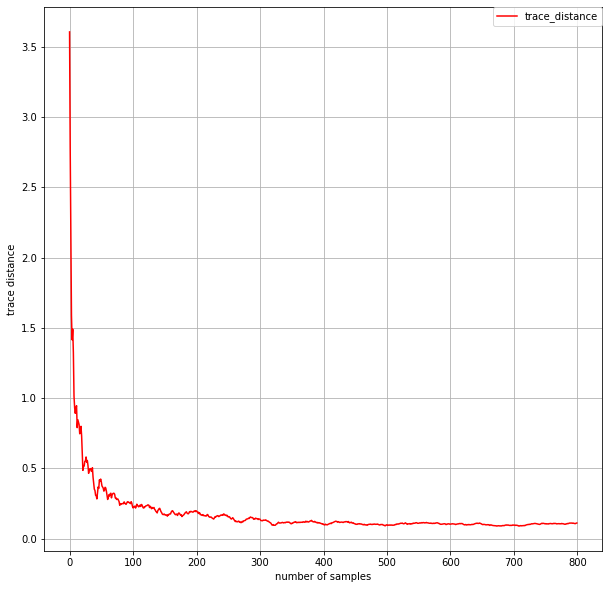

In [10]:
# 打印出量子态的近似与初始量子态的迹距离结果图
fig,ax = plt.subplots(figsize=(10, 10))
plt.xlabel('number of samples')
plt.ylabel('trace distance')
j = range(len(tracedistance)) 
plt.plot(j, tracedistance, 'r', label="trace_distance")
"""open the grid"""
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
plt.show()

## 总结

本教程介绍了经典影子的基本原理与一些理论知识。在展示的案例中，我们基于量桨对一个随机生成的 2 个量子比特量子态构建了其经典影子。直观地感受了经典影子可以对一个未知的量子态做较好的近似。事实上，[2] 中指出在许多场景下，要求对量子系统进行完整的经典描述可能是多余的。相反，准确地估计量子系统的某些特性通常就足够了，这也是经典影子真正的重要性所在。在经典影子应用的教程（[基于经典影子的量子态性质估计](./ClassicalShadow_Application_CN.ipynb)）中，将具体介绍经典影子的应用以及如何在量桨中使用 shadow 功能。

## 参考文献

[1] Huang, Hsin-Yuan, Richard Kueng, and John Preskill. "Predicting many properties of a quantum system from very few measurements." [Nature Physics 16.10 (2020): 1050-1057.](https://authors.library.caltech.edu/102787/1/2002.08953.pdf)

[2] Aaronson, Scott. "Shadow tomography of quantum states." [SIAM Journal on Computing 49.5 (2019): STOC18-368.](https://dl.acm.org/doi/abs/10.1145/3188745.3188802)  

[3] Bravyi, Sergey, and Dmitri Maslov. "Hadamard-free circuits expose the structure of the Clifford group." [IEEE Transactions on Information Theory 67.7 (2021): 4546-4563.](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9435351)